#PART A: DATA ACQUISITION
#Importing the required libraries
#Loading the dataset into a pandas DataFrame
#Displaying the first 5 rows to understand the data structure


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Showing number of rows and columns in the dataset / observations and variales.


(1338, 7)

#Displaying the information about data types and non-null values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

#Show summary statistics for numerical variables


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#PART B: DATA CLEANING
#Check for missing values in each column


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#Check number of duplicate records


1

#Remove duplicate rows from dataset
#Confirm new shape after removing duplicates


(1337, 7)

#Outlier Detection (IQR Method)
#Define function to detect outliers using IQR method
#Detect outliers in BMI
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270
#Detect outliers in Charges
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23

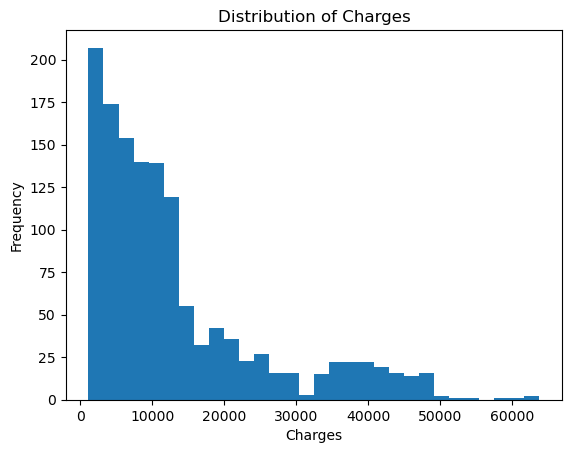

#Scatter plot to examine relationship between age and charges


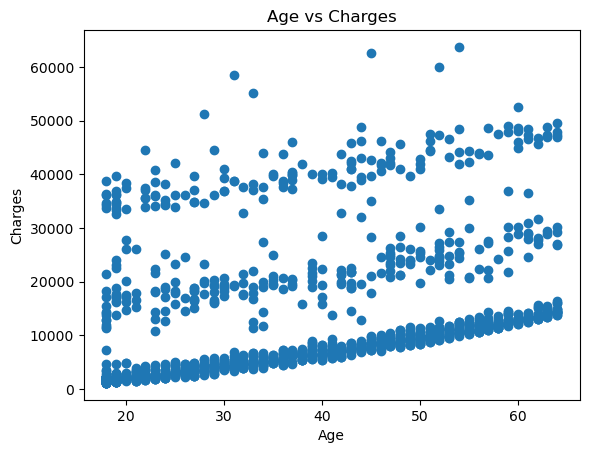

Scatter plot to examine relationship between BMI and charges


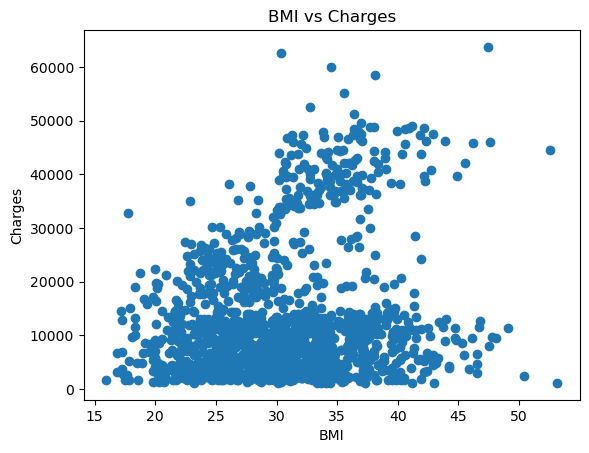

#Boxplot to compare charges between smokers and non-smokers


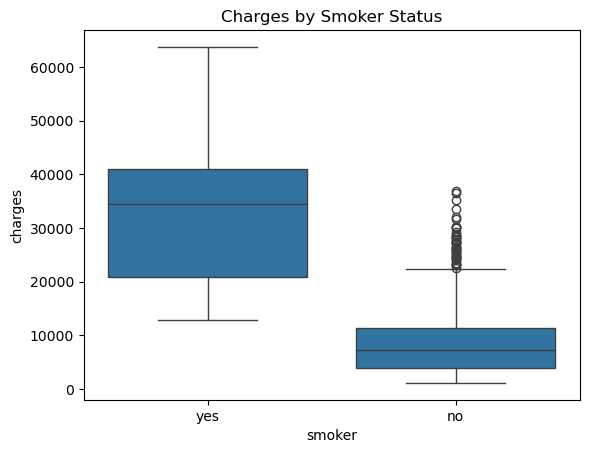

correlation matrix as heatmap


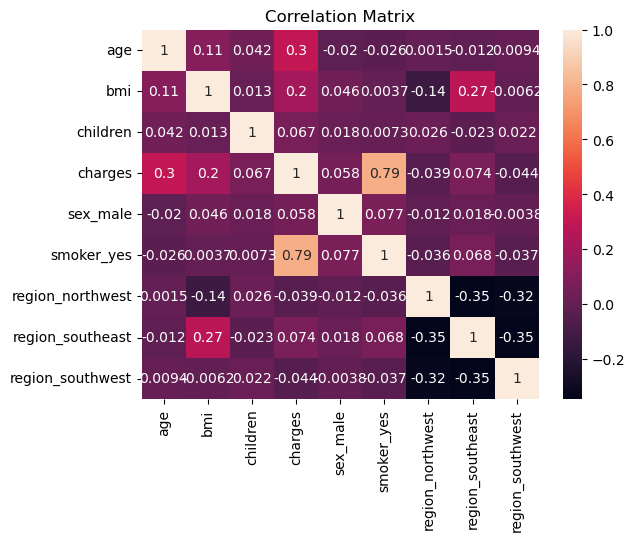

#PART D: REGRESSION MODELING
#Import regression libraries
#PART D: REGRESSION MODELING
#Make sure all encoded columns are numeric
#SIMPLE LINEAR REGRESSION
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     130.4
Date:                Mon, 02 Mar 2026   Prob (F-statistic):           6.98e-29
Time:                        10:50:36   Log-Likelihood:                -14405.
No. Observations:                1337   AIC:                         2.881e+04
Df Residuals:                    1335   BIC:                         2.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|

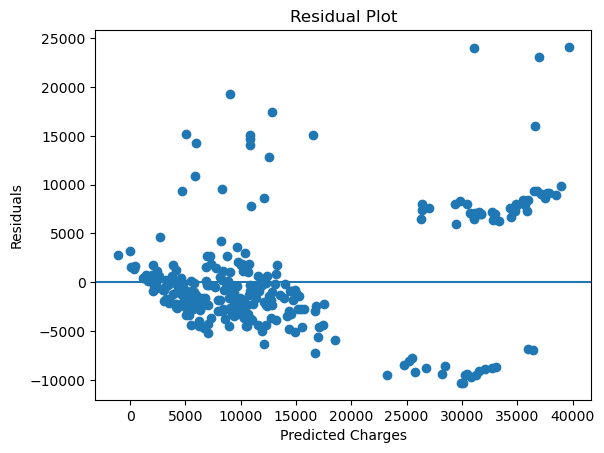

#Normality of Residuals
#Plot histogram of residuals to check normality


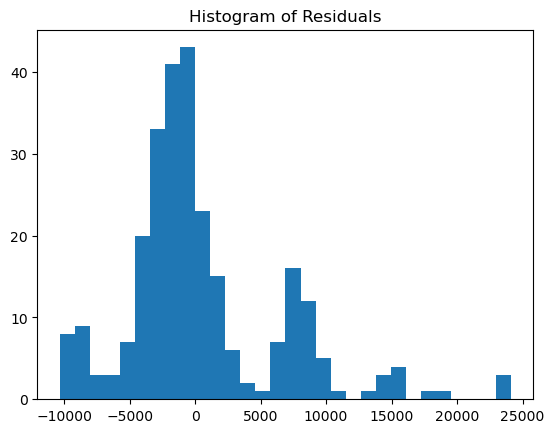

#Multicollinearity (VIF)
#Import VIF function
#Add constant to predictors
#Create dataframe to store VIF values
#Calculate VIF for each feature
#Display VIF results
            Feature        VIF
0             const  35.504594
1               age   1.016794
2               bmi   1.106742
3          children   1.004017
4          sex_male   1.008944
5        smoker_yes   1.012100
6  region_northwest   1.517673
7  region_southeast   1.651779
8  region_southwest   1.529044


In [3]:
#MUHOOZI DERICK
#2024/A/KSD/1263/F
print("#PART A: DATA ACQUISITION")

print("#Importing the required libraries")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from webencodings import Encoding

print("#Loading the dataset into a pandas DataFrame")
df = pd.read_csv("C:\\Users\\HP\\Desktop\\medic\\Medical Cost Personal Dataset.csv")

print("#Displaying the first 5 rows to understand the data structure")
display(df.head())

print("#Showing number of rows and columns in the dataset / observations and variales.")
display(df.shape)

print("#Displaying the information about data types and non-null values")
display(df.info())

print("#Show summary statistics for numerical variables")
display(df.describe())

print("#PART B: DATA CLEANING")

print("#Check for missing values in each column")
display(df.isnull().sum())
print("#Check number of duplicate records")
display(df.duplicated().sum())

print("#Remove duplicate rows from dataset")
df = df.drop_duplicates()

print("#Confirm new shape after removing duplicates")
display(df.shape)

print("#Outlier Detection (IQR Method)")
print("#Define function to detect outliers using IQR method")
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)   # First quartile
    Q3 = df[column].quantile(0.75)   # Third quartile
    IQR = Q3 - Q1                    # Interquartile range
    lower = Q1 - 1.5 * IQR           # Lower bound
    upper = Q3 + 1.5 * IQR           # Upper bound
    return df[(df[column] < lower) | (df[column] > upper)]

print("#Detect outliers in BMI")
print(detect_outliers("bmi"))

print("#Detect outliers in Charges")
print(detect_outliers("charges"))

print("#Encoding Categorical Variables")
print("#Convertpd.Categoricall variables into dummy variables")
df_encoded = pd.get_dummies(df, drop_first=True)

print("#Display first few rows after encoding")
print(df_encoded.head())

print("#PART C: EXPLORATORY DATA ANALYSIS")

print("#Plot histogram to see distribution of medical charges")
plt.hist(df['charges'], bins=30)
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()


print("#Scatter plot to examine relationship between age and charges")
plt.scatter(df['age'], df['charges'])
plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


print("Scatter plot to examine relationship between BMI and charges")
plt.scatter(df['bmi'], df['charges'])
plt.title("BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()


print("#Boxplot to compare charges between smokers and non-smokers")
sns.boxplot(x=df['smoker'], y=df['charges'])
plt.title("Charges by Smoker Status")
plt.show()
print("correlation matrix as heatmap")
sns.heatmap(df_encoded.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


print("#PART D: REGRESSION MODELING")
print("#Import regression libraries")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm


print("#PART D: REGRESSION MODELING")


import statsmodels.api as sm

print("#Make sure all encoded columns are numeric")
df_encoded = df_encoded.astype(float)


print("#SIMPLE LINEAR REGRESSION")


X_simple = df[['age']].astype(float)
y_simple = df['charges'].astype(float)

X_simple = sm.add_constant(X_simple)

model_simple = sm.OLS(y_simple, X_simple).fit()

print(model_simple.summary())



print("#MULTIPLE LINEAR REGRESSION")


print("#Define predictors")
X = df_encoded.drop('charges', axis=1)

print("#Define target")
y = df_encoded['charges']

print("#Convert everything to float (IMPORTANT STEP)")
X = X.astype(float)
y = y.astype(float)

print("#Add constant")
X = sm.add_constant(X)

print("#Fit model")
model = sm.OLS(y, X).fit()

print(model.summary())


print("#PART E: MODEL EVALUATION")


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("#Split data")
X_train, X_test, y_train, y_test = train_test_split(
    df_encoded.drop('charges', axis=1).astype(float),
    df_encoded['charges'].astype(float),
    test_size=0.2,
    random_state=42
)

print("#Create model")
lr = LinearRegression()

print("#Train model")
lr.fit(X_train, y_train)

print("#Predict")
y_pred = lr.predict(X_test)

print("#Evaluation metrics")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

print("#Calculate residuals (actual - predicted)")
residuals = y_test - y_pred

print("#Plot residuals to check homoscedasticity")
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.title("Residual Plot")
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.show()

print("#Normality of Residuals")
print("#Plot histogram of residuals to check normality")
plt.hist(residuals, bins=30)
plt.title("Histogram of Residuals")
plt.show()

print("#Multicollinearity (VIF)")
print("#Import VIF function")
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("#Add constant to predictors")
X_vif = sm.add_constant(df_encoded.drop('charges', axis=1))

print("#Create dataframe to store VIF values")
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns

print("#Calculate VIF for each feature")
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]
print("#Display VIF results")
print(vif_data)
